The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skinfold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index (weight in kg/(height in m)^2).
7. Diabetes pedigree function.
8. Age (years).
9. Class variable (0 or 1).

The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 65%. Top results achieve a classification accuracy of approximately 77%.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
col_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','test'
]

In [4]:
#pimdf.columns = col_names
pimdf = pd.read_csv('pima(1).csv',header=None)
pimdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
0    768 non-null int64
1    768 non-null int64
2    768 non-null int64
3    768 non-null int64
4    768 non-null int64
5    768 non-null float64
6    768 non-null float64
7    762 non-null float64
8    768 non-null int64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [5]:
pimdf.columns = col_names
pimdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,test
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,21.0,0
4,0,137,40,35,168,43.1,2.288,33.0,1


In [6]:
nan_index =  pimdf[pimdf['Age'].isnull()].index
nan_index

Int64Index([22, 25, 26, 34, 44, 58], dtype='int64')

In [7]:
pimdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         762 non-null float64
test                        768 non-null int64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


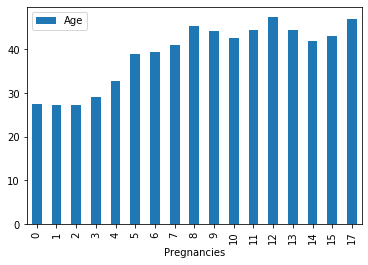

In [8]:
pimdf[['Age','Pregnancies']].groupby('Pregnancies').mean().plot(kind='bar')

In [10]:
pimdf['Age'] = pimdf[['Age','Pregnancies']].groupby('Pregnancies').transform(lambda x : x.fillna(x.mean()))
pimdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
test                        768 non-null int64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


pimdf['Age'] = pimdf['Age'].astype(float)

In [12]:
pimdf[pimdf['Age']]


KeyError: "None of [Float64Index([50.0, 31.0, 32.0, 21.0, 33.0, 30.0, 26.0, 29.0, 53.0, 54.0,\n              ...\n              26.0, 66.0, 22.0, 43.0, 33.0, 63.0, 27.0, 30.0, 47.0, 23.0],\n             dtype='float64', length=768)] are in the [columns]"

In [ ]:
pimdf.info()

In [13]:
pimdf.iloc[nan_index]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,test
22,7,196,90,0,0,39.8,0.451,41.095238,1
25,10,125,70,26,115,31.1,0.205,42.636364,1
26,7,147,76,0,0,39.4,0.257,41.095238,1
34,10,122,78,31,0,27.6,0.512,42.636364,0
44,7,159,64,0,0,27.4,0.294,41.095238,0
58,0,146,82,0,0,40.5,1.781,27.454545,0


In [14]:
pimdf['Age'] = pimdf['Age'].astype(int)

In [15]:
pimdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int32
test                        768 non-null int64
dtypes: float64(2), int32(1), int64(6)
memory usage: 51.1 KB


In [ ]:
#PREPARING THE DATASET FOR ML

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
pimdf['test'].unique()

array([1, 0], dtype=int64)

In [18]:
pimdf['test'].sum()/pimdf['test'].count()

0.3489583333333333

In [19]:
pimdf['test'].mean(0)

0.3489583333333333

In [20]:
y = pimdf['test']
X = pimdf.drop('test', axis =1)


In [40]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)


In [41]:
X_train_org.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89,62,0,0,22.5,0.142,33
127,1,118,58,36,94,33.3,0.261,23
564,0,91,80,0,0,32.4,0.601,27
375,12,140,82,43,325,39.2,0.528,58
663,9,145,80,46,130,37.9,0.637,40


In [42]:
mm = MinMaxScaler()
mm.fit(X_train_org)
X_train = mm.fit_transform(X_train_org)
X_test = mm.transform(X_test_org)

In [43]:
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test  = pd.DataFrame(X_test, columns = X.columns)

In [44]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.058824,1.005051,0.622951,0.434343,0.000000,0.639344,0.561913,0.016667
1,0.117647,0.540404,0.606557,0.303030,0.118203,0.500745,0.139197,0.033333
2,0.235294,0.383838,0.508197,0.000000,0.000000,0.506706,0.133646,0.066667
3,0.294118,0.838384,0.590164,0.191919,0.206856,0.384501,0.217336,0.500000
4,0.000000,0.560606,0.532787,0.000000,0.000000,0.366617,0.248506,0.166667
...,...,...,...,...,...,...,...,...
187,0.352941,0.626263,0.590164,0.000000,0.000000,0.411326,0.123826,0.133333
188,0.117647,0.727273,0.475410,0.333333,0.159574,0.470939,0.146883,0.066667
189,0.058824,0.550505,0.491803,0.080808,0.215130,0.378539,0.371050,0.000000
190,0.176471,0.646465,0.639344,0.000000,0.000000,0.314456,0.081127,0.566667


In [45]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.529412,0.449495,0.508197,0.000000,0.000000,0.335320,0.027327,0.200000
1,0.058824,0.595960,0.475410,0.363636,0.111111,0.496274,0.078138,0.033333
2,0.000000,0.459596,0.655738,0.000000,0.000000,0.482861,0.223313,0.100000
3,0.705882,0.707071,0.672131,0.434343,0.384161,0.584203,0.192143,0.616667
4,0.529412,0.732323,0.655738,0.464646,0.153664,0.564829,0.238685,0.316667
...,...,...,...,...,...,...,...,...
571,0.588235,0.510101,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
572,0.411765,0.803030,0.540984,0.000000,0.000000,0.453055,0.130231,0.250000
573,0.235294,0.474747,0.532787,0.222222,0.000000,0.368107,0.029889,0.000000
574,0.647059,0.429293,0.606557,0.000000,0.000000,0.448584,0.094791,0.233333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD99DF9388>,
      dtype=object)

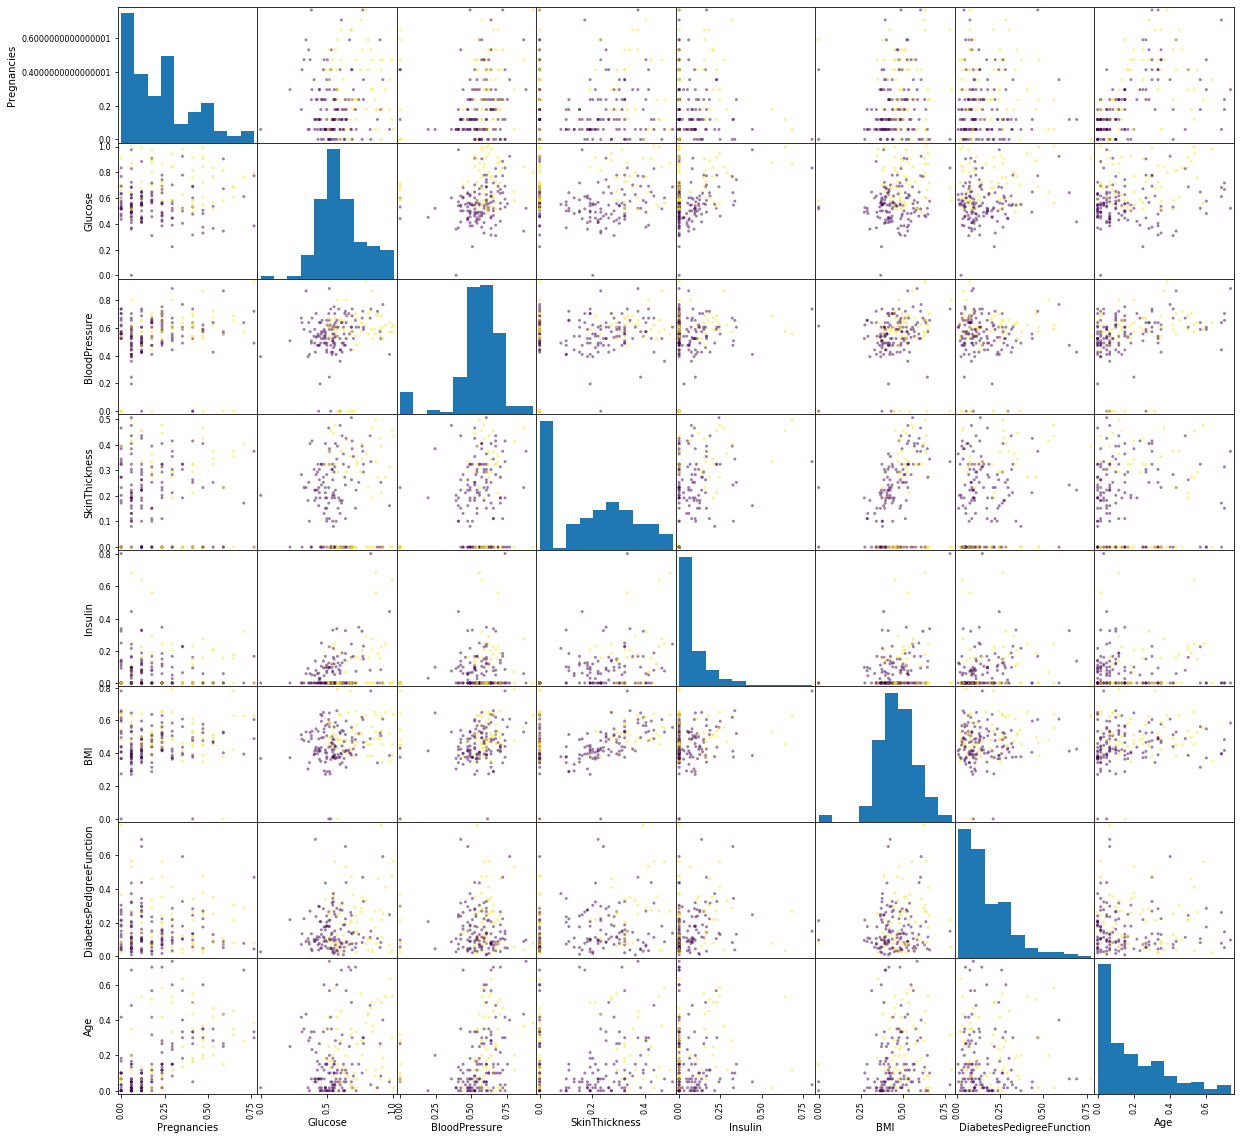

In [50]:
from matplotlib import cm
pd.plotting.scatter_matrix(X_test, figsize=(20,20), c = y_test)

## SVC


In [46]:
from sklearn.svm import SVC, LinearSVC

clf1 = SVC(kernel= 'linear', C= 0.01)
clf1.fit(X_train,y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
clf1.coef_

array([[ 0.04980515,  0.16921907, -0.0143248 ,  0.02554419,  0.02240027,
         0.08049218,  0.05680529,  0.04674167]])

In [48]:
clf1.intercept_

array([-1.14831109])

In [54]:
pimdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


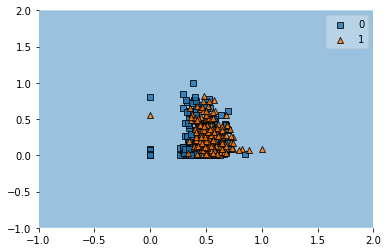

In [58]:
from mlxtend.plotting import plot_decision_regions
X2D = X_train[['BMI','Age']]    ##DATA IS NOT LINEARR - TRY Different kernels
clf_2d = SVC(kernel= 'linear', C=0.01)
clf_2d.fit(X2D, y_train)
plot_decision_regions(X2D.values, y_train.values,clf_2d)

### LOGISTIC REGRESSION

In [62]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(penalty='l2',C=10,random_state=0, solver='liblinear')
lreg.fit(X_train,y_train)

print("Train Score", lreg.score(X_train,y_train))
print("Test Score", lreg.score(X_test,y_test))

Train Score 0.7638888888888888
Test Score 0.796875


In [63]:
lreg.predict_proba(X_test) #probability of 0 and 1 ([,])

array([[0.06069237, 0.93930763],
       [0.82323572, 0.17676428],
       [0.90287377, 0.09712623],
       [0.3591455 , 0.6408545 ],
       [0.86585579, 0.13414421],
       [0.95249005, 0.04750995],
       [0.27862265, 0.72137735],
       [0.15716867, 0.84283133],
       [0.58893387, 0.41106613],
       [0.59655285, 0.40344715],
       [0.42469377, 0.57530623],
       [0.05089053, 0.94910947],
       [0.6870306 , 0.3129694 ],
       [0.80172447, 0.19827553],
       [0.85775338, 0.14224662],
       [0.82282531, 0.17717469],
       [0.1620464 , 0.8379536 ],
       [0.96738449, 0.03261551],
       [0.53811029, 0.46188971],
       [0.74316719, 0.25683281],
       [0.36883334, 0.63116666],
       [0.62371776, 0.37628224],
       [0.78950126, 0.21049874],
       [0.91631129, 0.08368871],
       [0.9359828 , 0.0640172 ],
       [0.66059221, 0.33940779],
       [0.94324527, 0.05675473],
       [0.11217996, 0.88782004],
       [0.87823275, 0.12176725],
       [0.85306001, 0.14693999],
       [0.

In [ ]:
clf2 = predict

In [64]:
train_P = lreg.predict_proba(X_train)
test_P = lreg.predict_proba(X_test)

In [68]:
train_P

array([[0.91108618, 0.08891382],
       [0.77070353, 0.22929647],
       [0.89873487, 0.10126513],
       ...,
       [0.92897011, 0.07102989],
       [0.84284011, 0.15715989],
       [0.86672222, 0.13327778]])

In [77]:
train_pred = (train_P[:,1] > 0.565).astype(int)
print(train_pred)
test_pred = (test_P[:,1]>0.565).astype(int)
print(test_pred)

[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0
 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 

In [78]:
from sklearn.metrics import accuracy_score
print('Train Score', accuracy_score(y_train, train_pred))
print(' Test Score', accuracy_score(y_test, test_pred))

Train Score 0.7673611111111112
 Test Score 0.8072916666666666
